In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation

import datetime

In [14]:
data = pd.read_csv('samsung_5y.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-13,45140,45620,45140,45400,39327.17188,8624900
1,2017-06-14,45800,46060,45240,45360,39292.51172,10166700
2,2017-06-15,45680,45920,45180,45680,39569.71484,9657000
3,2017-06-16,45500,45940,45460,45580,39483.08203,17403450
4,2017-06-19,45580,46560,45560,46560,40332.00391,11303900


In [15]:
# deeprunning mid price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices)/2

In [16]:
# window 사이즈 아래는 50을 기준으로 잡고, 50 + 1로 하나씩 늘려간다.
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [17]:
#데이터 정규화
normalized_data = []
for window in result:
    normalized_window = [((float(p)/float(window[0]))-1) for p in window]
    normalized_data.append(normalized_window)

#데이터 정규화 시 null값들은 전부 정리
result = np.array(normalized_data)

#split train and test data

#training data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1057, 50, 1), (117, 50, 1))

In [18]:
#Build a Model
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50,1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
106/106 [==============================] - 6s 28ms/step - loss: 0.0017 - val_loss: 2.4924e-04
Epoch 2/20
106/106 [==============================] - 2s 20ms/step - loss: 9.6814e-04 - val_loss: 3.6364e-04
Epoch 3/20
106/106 [==============================] - 2s 20ms/step - loss: 7.0857e-04 - val_loss: 0.0015
Epoch 4/20
106/106 [==============================] - 2s 20ms/step - loss: 6.1531e-04 - val_loss: 2.4000e-04
Epoch 5/20
106/106 [==============================] - 2s 21ms/step - loss: 4.8674e-04 - val_loss: 1.6257e-04
Epoch 6/20
106/106 [==============================] - 2s 21ms/step - loss: 3.8635e-04 - val_loss: 2.3440e-04
Epoch 7/20
106/106 [==============================] - 2s 21ms/step - loss: 3.5177e-04 - val_loss: 1.7573e-04
Epoch 8/20
106/106 [==============================] - 2s 21ms/step - loss: 3.3885e-04 - val_loss: 1.3866e-04
Epoch 9/20
106/106 [==============================] - 2s 20ms/step - loss: 3.1682e-04 - val_loss: 1.4076e-04
Epoch 10/20
106/106 [======

4/4 [==============================] - 1s 9ms/step


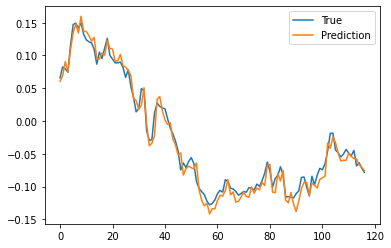

In [23]:
#prediction
pred = model.predict(x_test)

fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()